In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [2]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [3]:
df_Dirac_G_O = (1/2)*pd.read_csv(r'Channel/Dirac_G_O_Channel.txt', sep = '\t', header = None)
df_Dirac_P_O = (1/2)*pd.read_csv(r'Channel/Dirac_P_O_Channel.txt', sep = '\t', header = None)

df_Dirac_G_U = (1/2)*pd.read_csv(r'Channel/Dirac_G_U_Channel.txt', sep = '\t', header = None)
df_Dirac_P_U = (1/2)*pd.read_csv(r'Channel/Dirac_P_U_Channel.txt', sep = '\t', header = None)

df_Dirac_G_S = (1/4)*pd.read_csv(r'Channel/Dirac_G_S_Channel.txt', sep = '\t', header = None)
df_Dirac_P_S = (1/4)*pd.read_csv(r'Channel/Dirac_P_S_Channel.txt', sep = '\t', header = None)

In [4]:
df_Dirac_G_O.rename(columns = lambda s:s+1, index = lambda s: s+1)
#The rows and columns represent the steps (billiards setups of chaotic ensemble) and the open channels, respectively.

,1,2,3,4,5,6,7,8,9,10
1,0.262895,0.999425,1.247705,1.805700,2.217010,3.008920,3.186265,4.143980,4.296105,5.000050
2,0.588245,0.834685,1.342030,2.059320,2.091465,2.625105,3.680050,4.043175,4.428880,4.710505
3,0.646070,1.035285,1.463600,2.072935,2.212490,3.067460,3.586265,3.738780,4.269665,4.926215
4,0.567345,0.778355,1.626070,1.773885,2.447135,2.962670,3.532130,3.823005,4.007615,4.733465
5,0.903915,1.286580,1.915720,1.574875,2.215260,2.737505,3.798665,3.613045,4.620360,4.528965
...,...,...,...,...,...,...,...,...,...,...
99996,0.640160,0.834490,1.519340,1.861510,2.588710,2.772880,3.235210,3.673155,4.400795,4.956145
99997,0.693850,0.913385,1.512335,1.544665,2.424435,2.817795,4.060715,3.477605,4.345260,4.797275
99998,0.298943,0.995745,1.252970,1.649500,2.579690,3.184985,3.406320,4.017635,5.006050,4.936860
99999,0.452289,1.032775,1.276130,2.163475,2.170655,2.899575,3.481265,3.589045,4.554490,5.025000


In [5]:
G_O = df_Dirac_G_O.values
P_O = df_Dirac_P_O.values

G_U = df_Dirac_G_U.values
P_U = df_Dirac_P_U.values

G_S = df_Dirac_G_S.values
P_S = df_Dirac_P_S.values

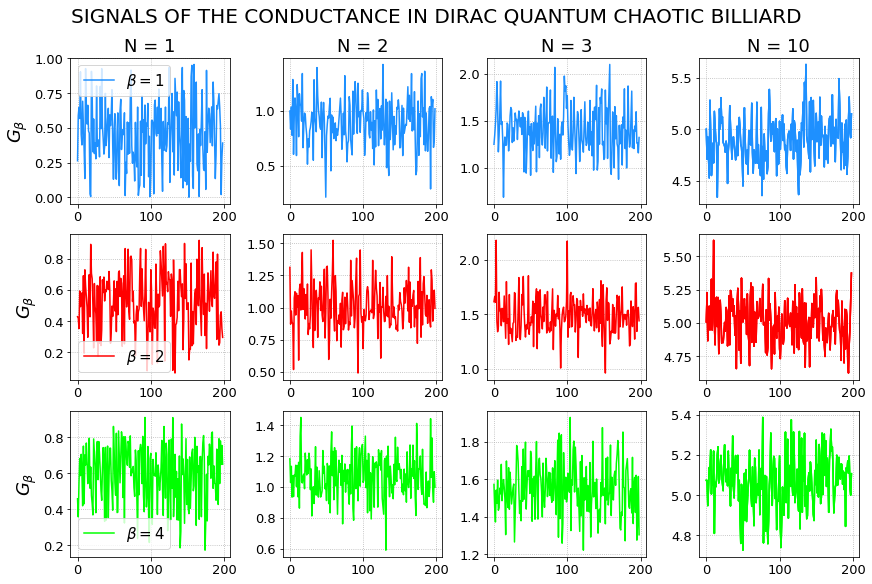

In [6]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN DIRAC QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_O[0:199,9], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            axs[1,3].plot(G_U[0:199,9], color='red', label = r'$\beta = 2$', alpha=1);
            axs[2,3].plot(G_S[0:199,9], color='lime', label = r'$\beta = 4$', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_O[0:199,j], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            else:
                if (i == 1):
                    axs[i,j].plot(G_U[0:199,j], color='red', label = r'$\beta = 2$', alpha=1);
                else:
                    if (i == 2):
                        axs[i,j].plot(G_S[0:199,j], color='lime', label = r'$\beta = 4$', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 15)
            
        axs[i,j].grid(linestyle=':')

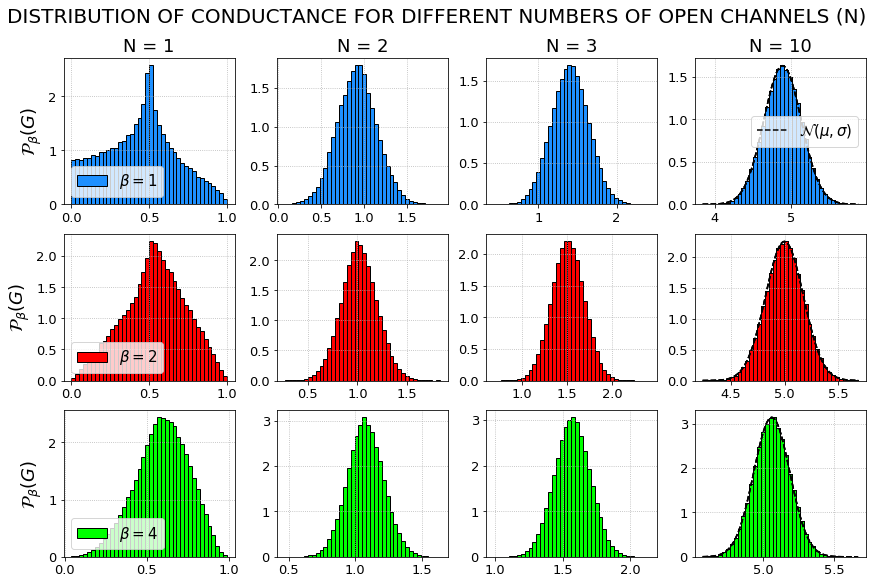

In [7]:
steps = 50

fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(G_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(G_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_O[:,9]), np.max(G_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_U[:,9]), np.max(G_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(G_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(G_S[:,9]), np.max(G_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(G_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(G_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(G_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(G)$', fontsize = 18)
            axs[i,0].legend(fontsize = 15, loc = "lower left")
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15)
        
        axs[i,j].grid(linestyle=':')

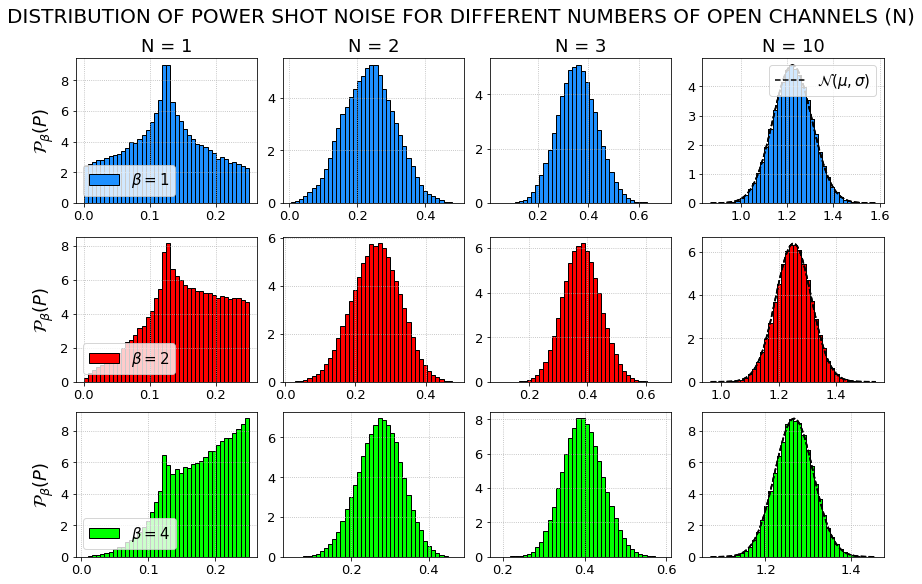

In [8]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(P_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(P_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(P_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            
            x = np.linspace(np.min(P_O[:,9]), np.max(P_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(P_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(P_U[:,9]), np.max(P_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(P_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(P_S[:,9]), np.max(P_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(P_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(P_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(P_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(P_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(P)$', fontsize = 18)
            axs[i,0].legend(fontsize = 15, loc = "lower left")
            
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = "upper right")
        
        axs[i,j].grid(linestyle=':')

In [9]:

meanG_O = np.mean(G_O, axis = 0)
meanG_U = np.mean(G_U, axis = 0)
meanG_S = np.mean(G_S, axis = 0)

varG_O = np.var(G_O, axis = 0)
varG_U = np.var(G_U, axis = 0)
varG_S = np.var(G_S, axis = 0)

meanP_O = np.mean(P_O, axis = 0)
meanP_U = np.mean(P_U, axis = 0)
meanP_S = np.mean(P_S, axis = 0)

varP_O = np.var(P_O, axis = 0)
varP_U = np.var(P_U, axis = 0)
varP_S = np.var(P_S, axis = 0)

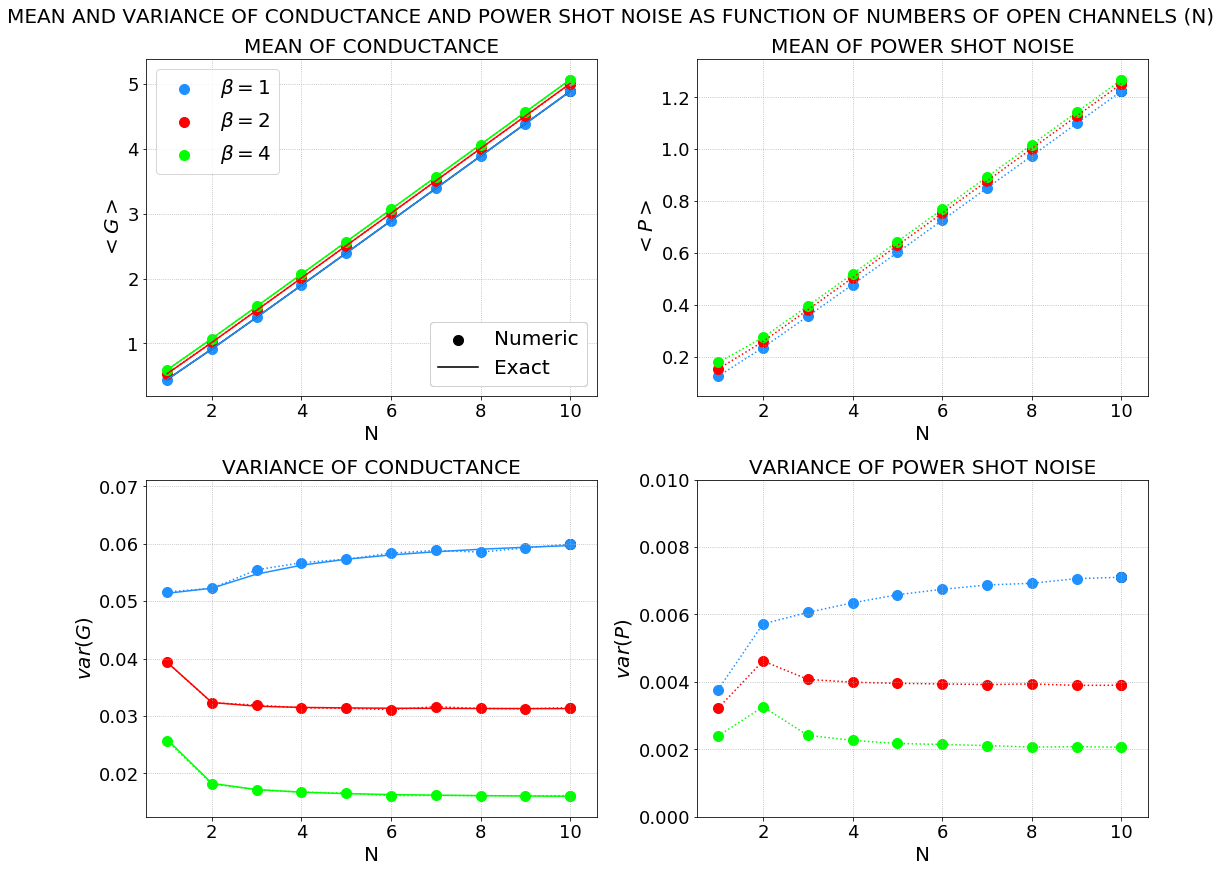

In [10]:
N1 = [i for i in range(1,11)]
N2 = N1
NT = N1+N2

meanG_O_aux = np.empty(10, dtype = float)
meanG_U_aux = np.empty(10, dtype = float)
meanG_S_aux = np.empty(10, dtype = float)

varG_O_aux = np.empty(10, dtype = float)
varG_U_aux = np.empty(10, dtype = float)
varG_S_aux = np.empty(10, dtype = float)

for N1 in range(1,11):
    
    N2 = N1
    NT = N1 + N2

    meanG_O_aux[N1-1] = (1/2)*(4*1*(N1*N2*NT))/((1*NT+1)*(2*NT-1))
    meanG_U_aux[N1-1] = (1/2)*(4*2*(N1*N2*NT))/((2*NT+1)*(2*NT-1))
    meanG_S_aux[N1-1] = (1/2)*(4*4*(N1*N2*NT))/((4*NT+1)*(2*NT-1))
    
    varG_O_aux[N1-1] = (1/4)*(16*N1*N2*NT*(3+2*np.power(NT,3)+4*N1*N2*np.power(NT,2)-4*NT-4*N1*N2-5*np.power(N1,2)-5*np.power(N2,2)))/((2*NT-3)*((np.power((2*NT-1),2)))*(NT+3)*(np.power((NT+1),2))*(2*NT+1))
    varG_U_aux[N1-1] = (1/4)*(8*N1*N2*(3+16*N1*N2*np.power(NT,2)-6*np.power(NT,2)-6*np.power(N1,2)-6*np.power(N2,2)))/((2*NT-3)*(2*NT+3)*(np.power((2*NT+1),2))*(np.power((2*NT-1),2)))
    varG_S_aux[N1-1] = (1/4)*(32*N1*N2*NT*(3-16*N1*N2+8*NT-20*np.power(N1,2)-20*np.power(N2,2)-16*np.power(NT,3)+64*N1*N2*np.power(NT,2)))/((4*NT+3)*(np.power((4*NT+1),2))*(2*NT-3)*(np.power((2*NT-1),2))*(4*NT-1))

fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'MEAN AND VARIANCE OF CONDUCTANCE AND POWER SHOT NOISE AS FUNCTION OF NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('MEAN OF CONDUCTANCE', fontsize = 20)
            axs[0,0].set_ylabel(r'$<G>$', fontsize = 20)
            
            variable_O = meanG_O; variable_U = meanG_U; variable_S = meanG_S
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('VARIANCE OF CONDUCTANCE', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
                variable_O = varG_O; variable_U = varG_U; variable_S = varG_S
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('MEAN OF POWER SHOT NOISE', fontsize = 20)
                    axs[0,1].set_ylabel(r'$<P>$', fontsize = 20)
                    
                    variable_O = meanP_O; variable_U = meanP_U; variable_S = meanP_S
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('VARIANCE OF POWER SHOT NOISE', fontsize = 20)
                        axs[1,1].set_ylabel(r'$var(P)$', fontsize = 20)
                        axs[1,1].set_ylim([0,0.010])

                        variable_O = varP_O; variable_U = varP_U; variable_S = varP_S 
        
        
        for k in range(0,len(meanG_O)):
            axs[i,j].scatter((k+1), variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k+1), variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k+1), variable_S[k], s = 100, color = 'lime', alpha = 1)
            
            if k == (len(meanG_O)-1):
                Numeric_scatter = axs[i,j].scatter((k+1), variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k+1), variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k+1), variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k+1), variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)

        axs[i,j].plot([i for i in range(1,11)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_S, color = 'lime', linestyle = ':')
        
        if (i == 0 and j == 0):
            Exact_plot, = axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, label = 'Exact', color = 'black', linestyle = '-')
            axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, color = 'dodgerblue', linestyle = '-')
            axs[0,0].plot([i for i in range(1,11)], meanG_U_aux, color = 'red', linestyle = '-')
            axs[0,0].plot([i for i in range(1,11)], meanG_S_aux, color = 'lime', linestyle = '-')
        
        if (i == 1 and j == 0):
            axs[1,0].plot([i for i in range(1,11)], varG_O_aux , color = 'dodgerblue', linestyle = '-')
            axs[1,0].plot([i for i in range(1,11)], varG_U_aux, color = 'red', linestyle = '-')
            axs[1,0].plot([i for i in range(1,11)], varG_S_aux, color = 'lime', linestyle = '-')

        axs[i,j].grid(linestyle=':')
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel('N', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)

In [11]:
df_G_O_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_O_Gamma_N1.txt', sep='\t', header = None)
df_G_U_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_U_Gamma_N1.txt', sep='\t', header = None)
df_G_S_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_S_Gamma_N1.txt', sep='\t', header = None)

df_G_O_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_O_Gamma_N2.txt', sep='\t', header = None)
df_G_U_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_U_Gamma_N2.txt', sep='\t', header = None)
df_G_S_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_S_Gamma_N2.txt', sep='\t', header = None)

df_G_O_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_O_Gamma_N3.txt', sep='\t', header = None)
df_G_U_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_U_Gamma_N3.txt', sep='\t', header = None)
df_G_S_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_S_Gamma_N3.txt', sep='\t', header = None)

df_G_O_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_O_Gamma_N10.txt', sep='\t', header = None)
df_G_U_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_U_Gamma_N10.txt', sep='\t', header = None)
df_G_S_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Dirac_G_S_Gamma_N10.txt', sep='\t', header = None)

G_O_Gamma_N1 = df_G_O_Gamma_N1.values
G_U_Gamma_N1 = df_G_U_Gamma_N1.values
G_S_Gamma_N1 = (df_G_S_Gamma_N1.values)/2

G_O_Gamma_N2 = df_G_O_Gamma_N2.values
G_U_Gamma_N2 = df_G_U_Gamma_N2.values
G_S_Gamma_N2 = (df_G_S_Gamma_N2.values)/2

G_O_Gamma_N3 = df_G_O_Gamma_N3.values
G_U_Gamma_N3 = df_G_U_Gamma_N3.values
G_S_Gamma_N3 = (df_G_S_Gamma_N3.values)/2

G_O_Gamma_N10 = df_G_O_Gamma_N10.values
G_U_Gamma_N10 = df_G_U_Gamma_N10.values
G_S_Gamma_N10 = (df_G_S_Gamma_N10.values)/2

In [12]:
meanG_O_1 = np.mean(G_O_Gamma_N1, axis = 0)
meanG_U_1 = np.mean(G_U_Gamma_N1, axis = 0)
meanG_S_1 = np.mean(G_S_Gamma_N1, axis = 0)

meanG_O_2 = np.mean(G_O_Gamma_N2, axis = 0)
meanG_U_2 = np.mean(G_U_Gamma_N2, axis = 0)
meanG_S_2 = np.mean(G_S_Gamma_N2, axis = 0)

meanG_O_3 = np.mean(G_O_Gamma_N3, axis = 0)
meanG_U_3 = np.mean(G_U_Gamma_N3, axis = 0)
meanG_S_3 = np.mean(G_S_Gamma_N3, axis = 0)

meanG_O_10 = np.mean(G_O_Gamma_N10, axis = 0)
meanG_U_10 = np.mean(G_U_Gamma_N10, axis = 0)
meanG_S_10 = np.mean(G_S_Gamma_N10, axis = 0)

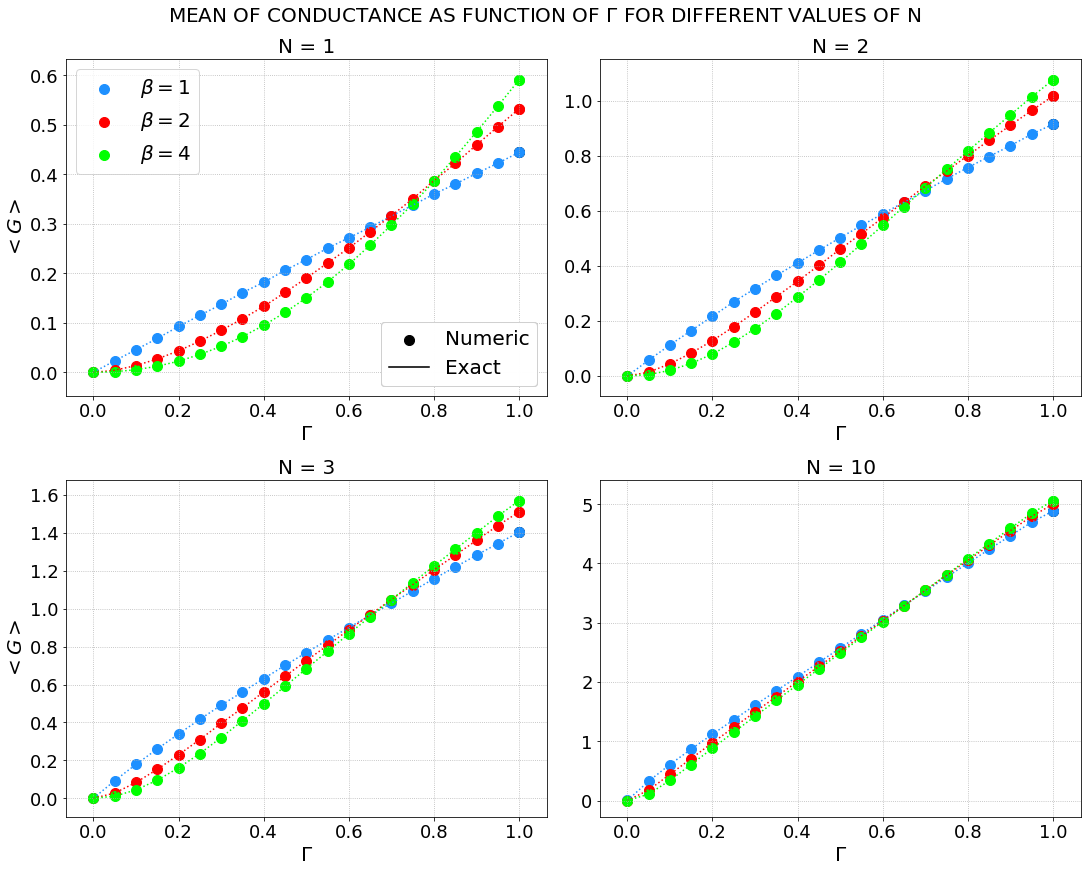

In [13]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'MEAN OF CONDUCTANCE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$<G>$', fontsize = 20)
            
            variable_O = meanG_O_1; variable_U = meanG_U_1; variable_S = meanG_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$<G>$', fontsize = 20)
            
                variable_O = meanG_O_3; variable_U = meanG_U_3; variable_S = meanG_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_O = meanG_O_2; variable_U = meanG_U_2; variable_S = meanG_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_O = meanG_O_10; variable_U = meanG_U_10; variable_S = meanG_S_10 
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)
            
            if k == (len(meanG_O_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, color = 'lime', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        N = N + 1

In [14]:
df_P_O_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_O_Gamma_N1.txt', sep='\t', header = None)
df_P_U_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_U_Gamma_N1.txt', sep='\t', header = None)
df_P_S_Gamma_N1 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_S_Gamma_N1.txt', sep='\t', header = None)

df_P_O_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_O_Gamma_N2.txt', sep='\t', header = None)
df_P_U_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_U_Gamma_N2.txt', sep='\t', header = None)
df_P_S_Gamma_N2 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_S_Gamma_N2.txt', sep='\t', header = None)

df_P_O_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_O_Gamma_N3.txt', sep='\t', header = None)
df_P_U_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_U_Gamma_N3.txt', sep='\t', header = None)
df_P_S_Gamma_N3 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_S_Gamma_N3.txt', sep='\t', header = None)

df_P_O_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_O_Gamma_N10.txt', sep='\t', header = None)
df_P_U_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_U_Gamma_N10.txt', sep='\t', header = None)
df_P_S_Gamma_N10 = (1/2)*pd.read_csv(r'Gamma/Dirac_P_S_Gamma_N10.txt', sep='\t', header = None)

P_O_Gamma_N1 = df_P_O_Gamma_N1.values
P_U_Gamma_N1 = df_P_U_Gamma_N1.values
P_S_Gamma_N1 = (df_P_S_Gamma_N1.values)/2

P_O_Gamma_N2 = df_P_O_Gamma_N2.values
P_U_Gamma_N2 = df_P_U_Gamma_N2.values
P_S_Gamma_N2 = (df_P_S_Gamma_N2.values)/2

P_O_Gamma_N3 = df_P_O_Gamma_N3.values
P_U_Gamma_N3 = df_P_U_Gamma_N3.values
P_S_Gamma_N3 = (df_P_S_Gamma_N3.values)/2

P_O_Gamma_N10 = df_P_O_Gamma_N10.values
P_U_Gamma_N10 = df_P_U_Gamma_N10.values
P_S_Gamma_N10 = (df_P_S_Gamma_N10.values)/2

In [15]:
meanP_O_1 = np.mean(P_O_Gamma_N1, axis = 0)
meanP_U_1 = np.mean(P_U_Gamma_N1, axis = 0)
meanP_S_1 = np.mean(P_S_Gamma_N1, axis = 0)

meanP_O_2 = np.mean(P_O_Gamma_N2, axis = 0)
meanP_U_2 = np.mean(P_U_Gamma_N2, axis = 0)
meanP_S_2 = np.mean(P_S_Gamma_N2, axis = 0)

meanP_O_3 = np.mean(P_O_Gamma_N3, axis = 0)
meanP_U_3 = np.mean(P_U_Gamma_N3, axis = 0)
meanP_S_3 = np.mean(P_S_Gamma_N3, axis = 0)

meanP_O_10 = np.mean(P_O_Gamma_N10, axis = 0)
meanP_U_10 = np.mean(P_U_Gamma_N10, axis = 0)
meanP_S_10 = np.mean(P_S_Gamma_N10, axis = 0)

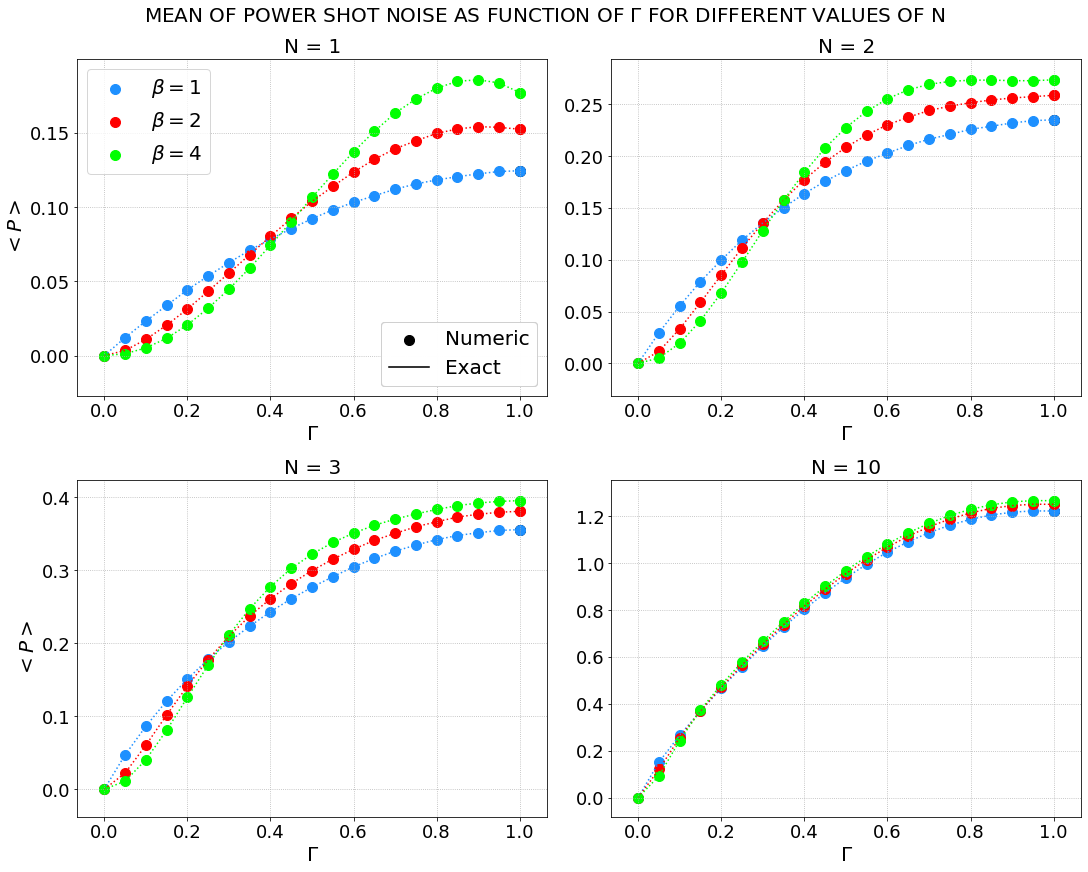

In [16]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'MEAN OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$<P>$', fontsize = 20)
            
            variable_O = meanP_O_1; variable_U = meanP_U_1; variable_S = meanP_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$<P>$', fontsize = 20)
            
                variable_O = meanP_O_3; variable_U = meanP_U_3; variable_S = meanP_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_O = meanP_O_2; variable_U = meanP_U_2; variable_S = meanP_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_O = meanP_O_10; variable_U = meanP_U_10; variable_S = meanP_S_10 
        
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)
            
            if k == (len(meanG_O_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)

        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, color = 'lime', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)


        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        
        N = N + 1

In [17]:
varG_O_1 = np.var(G_O_Gamma_N1, axis = 0)
varG_U_1 = np.var(G_U_Gamma_N1, axis = 0)
varG_S_1 = np.var(G_S_Gamma_N1, axis = 0)

varG_O_2 = np.var(G_O_Gamma_N2, axis = 0)
varG_U_2 = np.var(G_U_Gamma_N2, axis = 0)
varG_S_2 = np.var(G_S_Gamma_N2, axis = 0)

varG_O_3 = np.var(G_O_Gamma_N3, axis = 0)
varG_U_3 = np.var(G_U_Gamma_N3, axis = 0)
varG_S_3 = np.var(G_S_Gamma_N3, axis = 0)

varG_O_10 = np.var(G_O_Gamma_N10, axis = 0)
varG_U_10 = np.var(G_U_Gamma_N10, axis = 0)
varG_S_10 = np.var(G_S_Gamma_N10, axis = 0)

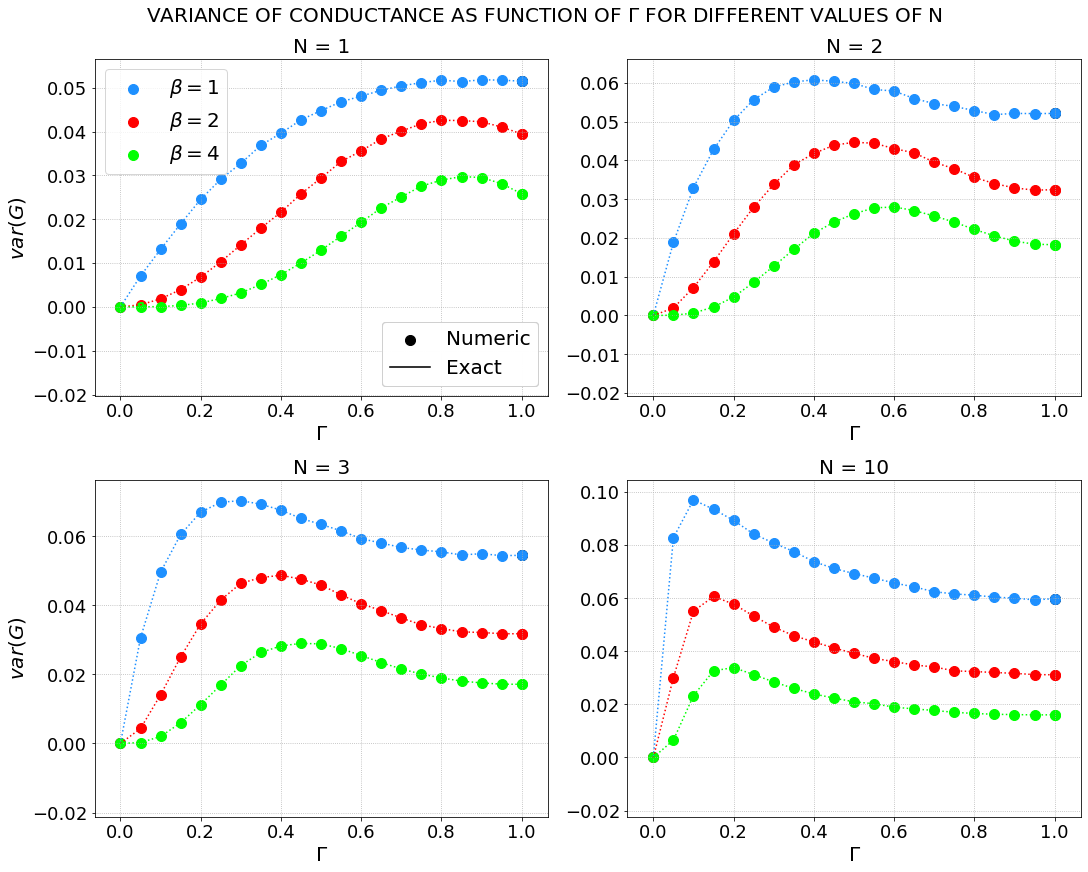

In [18]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'VARIANCE OF CONDUCTANCE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

N = 1

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
            variable_O = varG_O_1; variable_U = varG_U_1; variable_S = varG_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
                variable_O = varG_O_3; variable_U = varG_U_3; variable_S = varG_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    
                    variable_O = varG_O_2; variable_U = varG_U_2; variable_S = varG_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)

                        variable_O = varG_O_10; variable_U = varG_U_10; variable_S = varG_S_10 
        
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)

            if k == (len(meanG_O_1)-1):
                Numeric_scatter = axs[i,j].scatter((k)/20, variable_O[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], label = r'$\beta = 1$', s = 100, color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], label = r'$\beta = 2$', s = 100, color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], label = r'$\beta = 4$', s = 100, color = 'lime', alpha = 1)
  
        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, label = r'$\beta = 1$', color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, label = r'$\beta = 2$', color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, label = r'$\beta = 4$', color = 'lime', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        
        first_legend = axs[0,0].legend([Numeric_scatter, Exact_plot], ["Numeric","Exact"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        
        N = N + 1

In [19]:
varP_O_1 = np.var(P_O_Gamma_N1, axis = 0)
varP_U_1 = np.var(P_U_Gamma_N1, axis = 0)
varP_S_1 = np.var(P_S_Gamma_N1, axis = 0)

varP_O_2 = np.var(P_O_Gamma_N2, axis = 0)
varP_U_2 = np.var(P_U_Gamma_N2, axis = 0)
varP_S_2 = np.var(P_S_Gamma_N2, axis = 0)

varP_O_3 = np.var(P_O_Gamma_N3, axis = 0)
varP_U_3 = np.var(P_U_Gamma_N3, axis = 0)
varP_S_3 = np.var(P_S_Gamma_N3, axis = 0)

varP_O_10 = np.var(P_O_Gamma_N10, axis = 0)
varP_U_10 = np.var(P_U_Gamma_N10, axis = 0)
varP_S_10 = np.var(P_S_Gamma_N10, axis = 0)

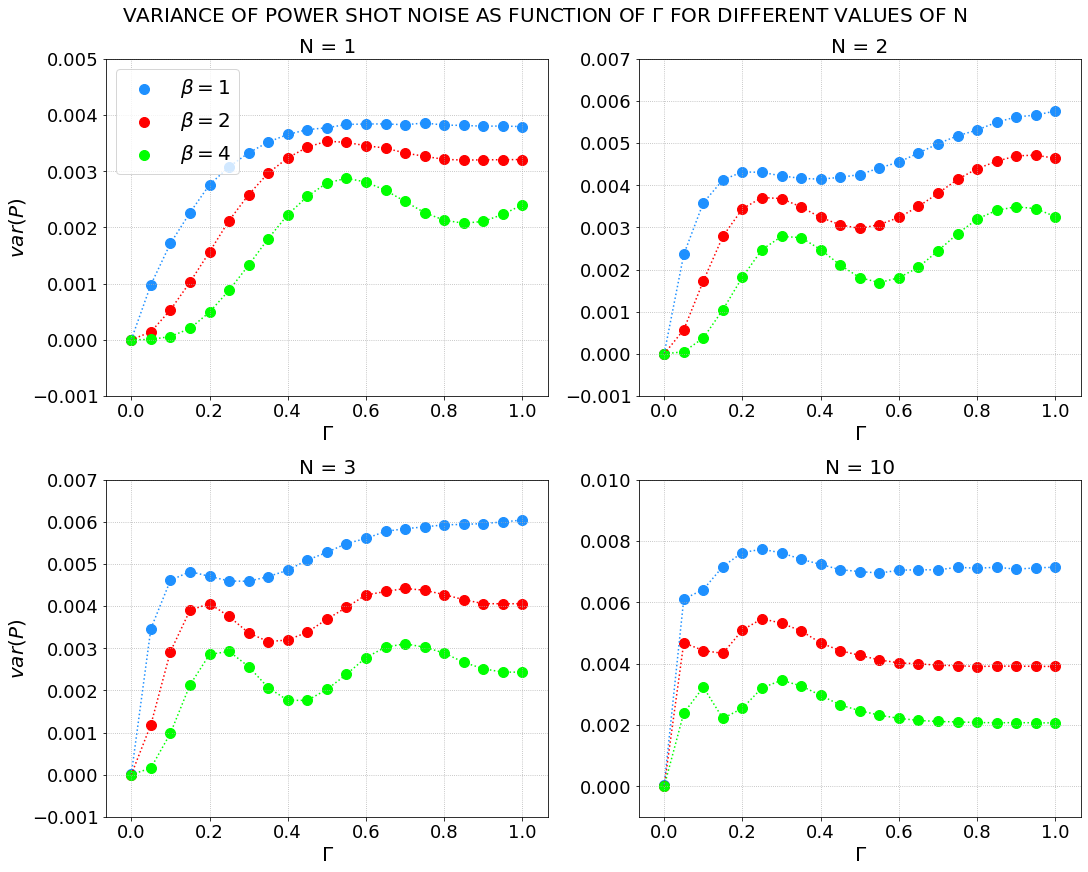

In [20]:
fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'VARIANCE OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ FOR DIFFERENT VALUES OF N', fontsize = 20)

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('N = 1', fontsize = 20)
            axs[0,0].set_ylabel(r'$var(P)$', fontsize = 20)
            axs[0,0].set_ylim([-0.001, 0.005])
            
            variable_O = varP_O_1; variable_U = varP_U_1; variable_S = varP_S_1
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('N = 3', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(P)$', fontsize = 20)
                axs[1,0].set_ylim([-0.001, 0.007])
            
                variable_O = varP_O_3; variable_U = varP_U_3; variable_S = varP_S_3
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('N = 2', fontsize = 20)
                    axs[0,1].set_ylim([-0.001, 0.007])
                    
                    variable_O = varP_O_2; variable_U = varP_U_2; variable_S = varP_S_2
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('N = 10', fontsize = 20)
                        axs[1,1].set_ylim([-0.001, 0.010])

                        variable_O = varP_O_10; variable_U = varP_U_10; variable_S = varP_S_10 
        
        
        for k in range(0,len(meanG_O_1)):
            axs[i,j].scatter((k)/20, variable_O[k], s = 100, color = 'dodgerblue', alpha = 1)
            axs[i,j].scatter((k)/20, variable_U[k], s = 100, color = 'red', alpha = 1)
            axs[i,j].scatter((k)/20, variable_S[k], s = 100, color = 'lime', alpha = 1)

            if k == len(meanG_O_1-1):
                beta_1 = axs[i,j].scatter((k)/20, variable_O[k], s = 100, label = r'$\beta = 1$', color = 'dodgerblue', alpha = 1)
                beta_2 = axs[i,j].scatter((k)/20, variable_U[k], s = 100, label = r'$\beta = 2$', color = 'red', alpha = 1)
                beta_4 = axs[i,j].scatter((k)/20, variable_S[k], s = 100, label = r'$\beta = 4$', color = 'lime', alpha = 1)
            
        axs[i,j].plot([i/20 for i in range(0,21)], variable_O, color = 'dodgerblue', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_U, color = 'red', linestyle = ':')
        axs[i,j].plot([i/20 for i in range(0,21)], variable_S, color = 'lime', linestyle = ':')
        
        axs[i,j].grid(linestyle=':')
        axs[0,0].legend([beta_1, beta_2, beta_4], [r'$\beta = 1$', r'$\beta = 2$', r'$\beta = 4$'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)

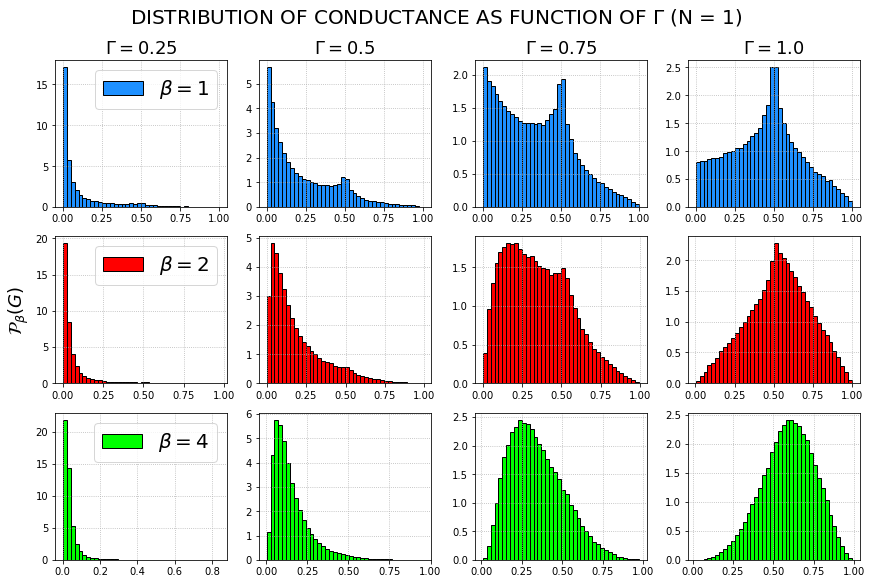

In [21]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE AS FUNCTION OF $\Gamma$ (N = 1)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(G_O_Gamma_N1[:,gamma_idx], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(G_U_Gamma_N1[:,gamma_idx], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
    axs[2,j].hist(G_S_Gamma_N1[:,gamma_idx], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[1,0].set_ylabel(r'$\mathcal{P}_{\beta}(G)$', fontsize = 18)
    
    for i in range(0,3):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':')

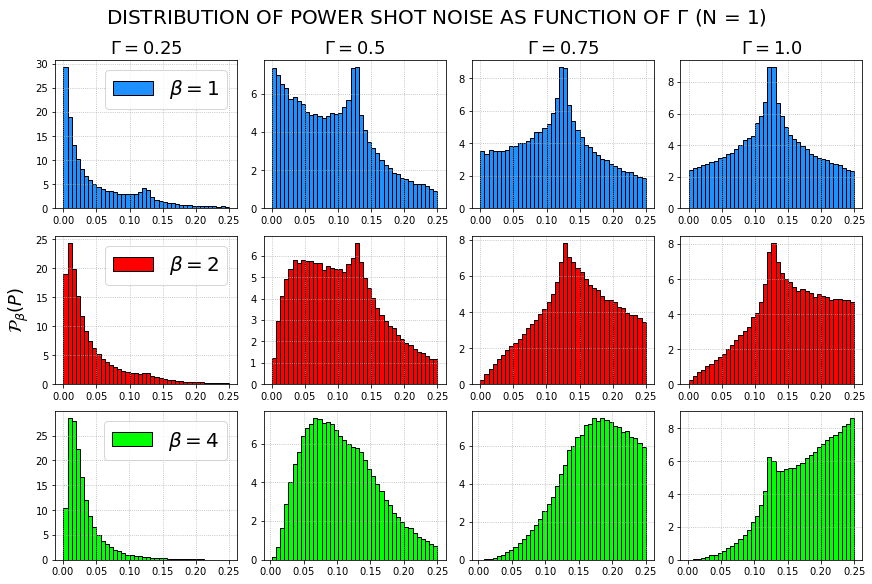

In [22]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE AS FUNCTION OF $\Gamma$ (N = 1)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(P_O_Gamma_N1[:,gamma_idx], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(P_U_Gamma_N1[:,gamma_idx], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
    axs[2,j].hist(P_S_Gamma_N1[:,gamma_idx], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[1,0].set_ylabel(r'$\mathcal{P}_{\beta}(P)$', fontsize = 18)
    
    for i in range(0,3):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':')

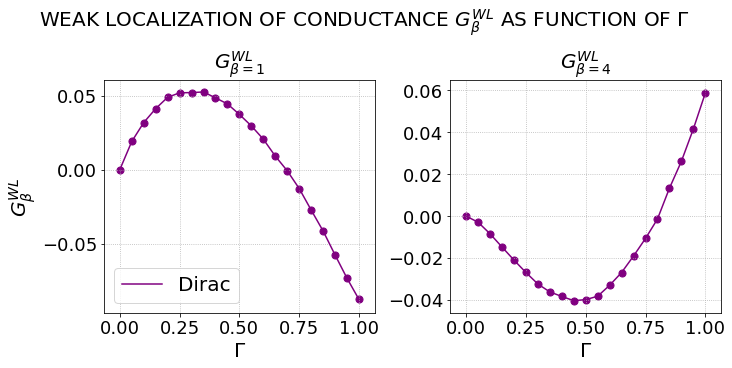

In [23]:
fig, axs = plt.subplots(1,2, figsize = (10,5), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION OF CONDUCTANCE $G^{WL}_{\beta}$ AS FUNCTION OF $\Gamma$', fontsize = 20)


for j in range(0,2):
        
    if (j == 0):
        axs[0].set_title(r'$G^{WL}_{\beta = 1}$', fontsize = 20)
        axs[0].set_ylabel(r'$G^{WL}_{\beta}$', fontsize = 20)
            
        variable_1 = meanG_O_1 - meanG_U_1;          
    else:
        if (j == 1):
                    
            axs[1].set_title(r'$G^{WL}_{\beta = 4}$', fontsize = 20)
                    
            variable_1 = meanG_S_1 - meanG_U_1;

        
    for k in range(0,len(meanG_O_1)):
        axs[j].scatter((k)/20, variable_1[k], s = 50, color = 'purple', alpha = 1)
       

    axs[j].plot([i/20 for i in range(0,21)], variable_1, label = 'Dirac', color = 'purple', linestyle = '-')

    axs[j].grid(linestyle=':')
    axs[0].legend(fontsize = 20)
    
    axs[j].set_xlabel(r'$\Gamma$', fontsize = 20)
    axs[j].tick_params(axis = 'both', which = 'major', labelsize = 18)

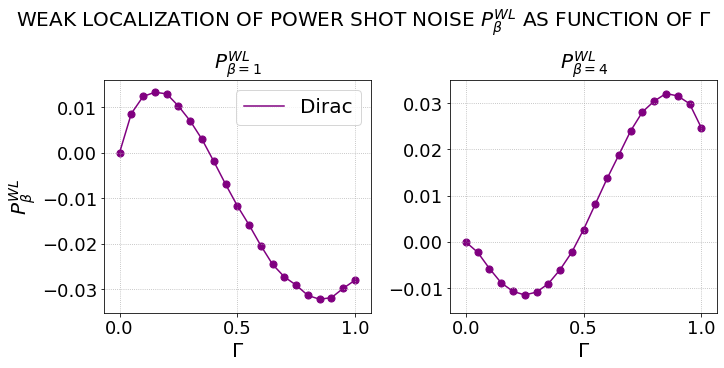

In [24]:
fig, axs = plt.subplots(1,2, figsize = (10,5), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION OF POWER SHOT NOISE $P^{WL}_{\beta}$ AS FUNCTION OF $\Gamma$', fontsize = 20)


for j in range(0,2):
        
    if (j == 0):
        axs[0].set_title(r'$P^{WL}_{\beta = 1}$', fontsize = 20)
        axs[0].set_ylabel(r'$P^{WL}_{\beta}$', fontsize = 20)
            
        variable_1 = meanP_O_1 - meanP_U_1;          
    else:
        if (j == 1):
                    
            axs[1].set_title(r'$P^{WL}_{\beta = 4}$', fontsize = 20)
                    
            variable_1 = meanP_S_1 - meanP_U_1;

        
    for k in range(0,len(meanG_O_1)):
        axs[j].scatter((k)/20, variable_1[k], s = 50, color = 'purple', alpha = 1)
       

    axs[j].plot([i/20 for i in range(0,21)], variable_1, label = 'Dirac', color = 'purple', linestyle = '-')

    axs[j].grid(linestyle=':')
    axs[0].legend(fontsize = 20)

    axs[j].set_xlabel(r'$\Gamma$', fontsize = 20)
    axs[j].tick_params(axis = 'both', which = 'major', labelsize = 18)